In [2]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

# BAGLS dataset

In [3]:
path = "Mini_BAGLS_dataset"  # you can use the Mini_BAGLS_dataset that we have provided for the homework

In [4]:
# get all filenames
files = os.listdir(path)

# what is os.listdir() returning?
# type ==> list()
print(type(files))

print(files)

<class 'list'>
['79_seg.png', '54.png', '82_seg.png', '44.png', '19_seg.png', '32.meta', '80_seg.png', '40_seg.png', '46.meta', '59_seg.png', '83_seg.png', '85.png', '7.meta', '43.meta', '55_seg.png', '13.png', '83.png', '38.meta', '51_seg.png', '24_seg.png', '73_seg.png', '34.png', '35_seg.png', '5.meta', '49_seg.png', '62.meta', '39_seg.png', '64.meta', '3.meta', '56.meta', '81.png', '64_seg.png', '37.meta', '13.meta', '96_seg.png', '98.meta', '6.png', '90.meta', '82.png', '22.meta', '85_seg.png', '58.png', '2_seg.png', '60.meta', '69_seg.png', '15_seg.png', '31.png', '85.meta', '43_seg.png', '93.png', '18_seg.png', '41.png', '50_seg.png', '87_seg.png', '11.meta', '42_seg.png', '1.png', '6.meta', '60.png', '44.meta', '0.png', '47_seg.png', '93.meta', '41_seg.png', '4.meta', '10.png', '84.meta', '9.png', '57.png', '75_seg.png', '20_seg.png', '0.meta', '34_seg.png', '65.png', '71_seg.png', '16.meta', '78.png', '86.meta', '83.meta', '19.meta', '32_seg.png', '34.meta', '26.meta', '22_seg

In [5]:
# pathlib is a nice library to work with paths
from pathlib import Path
path_pathlib = Path(path)
path_pathlib

PosixPath('Mini_BAGLS_dataset')

In [ ]:
# iterate over a list
for f in files:
    print(f)

In [ ]:
# get all unique filenames (e.g. each filename with file extension '.meta')
filenames = [f for f in files if '.meta' in f]
filenames

In [ ]:
# another way to combine os.listdir() and the for loop in one line --> use glob
import glob
glob_filenames = glob.glob(f"{path}/*.meta")
glob_filenames

In [9]:
# get filename (separate the number from the file extension)
print(filenames[4].split(".")[0])

path_pathlib = path_pathlib / "1009.meta"
print(path_pathlib.stem)

38
1009


In [10]:
# iterate over the filenames (with index)
for idx, f in enumerate(filenames):
    print(idx, f)
    break
    
# out: Index: X, Filename: YYYY

0 32.meta


In [67]:
img = skimage.io.imread(img_path, as_gray=True)

In [78]:
img

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00784314,
        0.01960784],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00784314,
        0.00392157],
       [0.00392157, 0.        , 0.        , ..., 0.00784314, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157]])

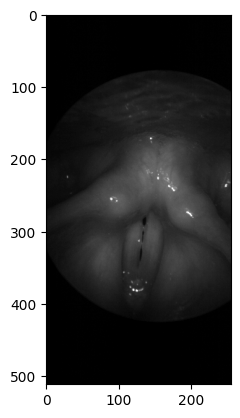

In [26]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2

## load image with different libraries
img_path = 'Mini_BAGLS_dataset/92.png'
img = io.imread(img_path)
# img = Image.open(img_path)
# img = skimage.io.imread(img_path)
# img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# load image as grayscale
# img = skimage.io.imread(img_path, as_gray=True)
plt.imshow(img, cmap='gray')

In [27]:
# which image loading function to use?
import time
def test_read_image(imgfile, func):
    t0 = time.time()
    img = func(imgfile)
    t = time.time() - t0
    return t

functions = [io.imread, Image.open, skimage.io.imread, cv2.imread]

times = []
for func in functions:
    ts = []
    # load each image
    for f in filenames:
        name = f.split(".")[0]
        t = test_read_image(os.path.join(path, name + ".png"), func)
        ts.append(t)
    times.append(ts)

In [28]:
# Note: we are calculating the mean time for each image loading method here
for t, func in zip(times, functions):
    print(str(func))
    print("{:.6f} seconds".format(np.mean(t)))
    print("_____")

<function imread at 0x7f339728cee0>
0.002164 seconds
_____
<function open at 0x7f33d83a0820>
0.000067 seconds
_____
<function imread at 0x7f3369c69550>
0.001911 seconds
_____
<built-in function imread>
0.001337 seconds
_____


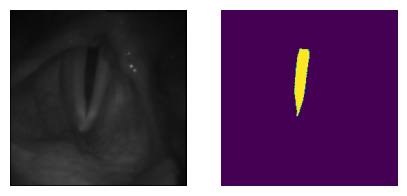

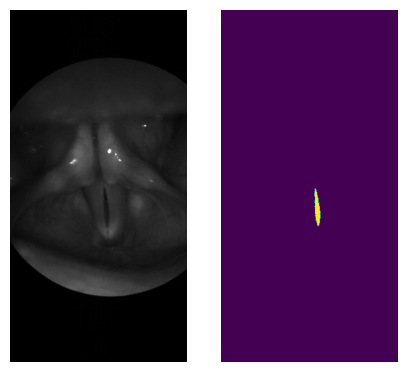

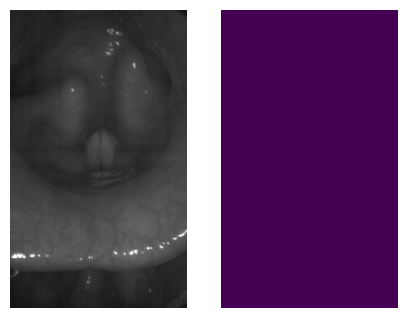

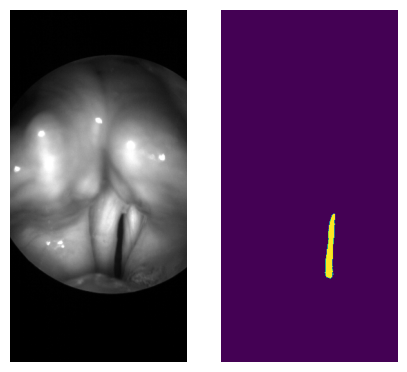

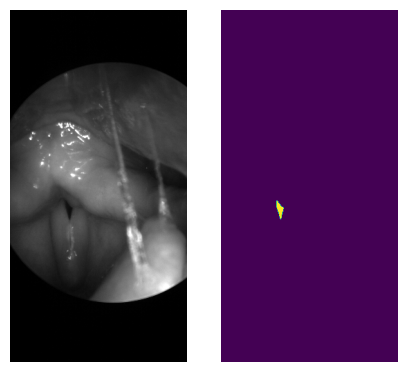

In [17]:
for idx, f in enumerate(glob_filenames):
    # make sure to only look at the first 5 samples and not all 2000 of them
    if idx == 5:
        break
    
    # get basename
    basename = os.path.basename(f)
        
    # split name
    name = basename.split(".")[0]
    
    # load image and segmentation mask
    img_path = os.path.join(path, name + ".png")
    seg_path = os.path.join(path, name + "_seg.png")
    img = io.imread(img_path)
    seg = io.imread(seg_path)

    # visualize image and segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
    ax1.axis("off"); ax2.axis("off")

    # show both
    ax1.imshow(img);ax2.imshow(seg)    
    plt.show()

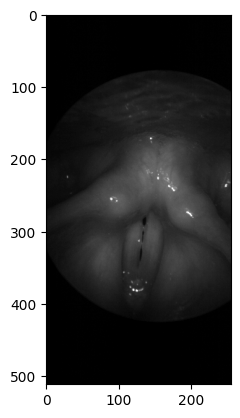

In [29]:
ref_image = img
plt.imshow(ref_image)

In [30]:
# saving with different formats

# tif
io.imwrite("saved_image.tif", ref_image)

# png
io.imwrite("saved_image.png", ref_image)

# jpg
io.imwrite("saved_image90.jpg", ref_image, quality=90) # quality specifies how much the saved JPEG image should be compressed
io.imwrite("saved_image10.jpg", ref_image, quality=10)

Text(0, 0.5, 'File size [bytes]')

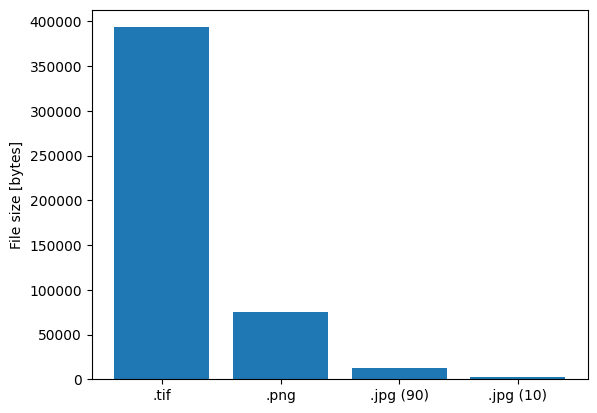

In [31]:
# check out memory footprints
img_tif_size = os.path.getsize("saved_image.tif")
img_png_size = os.path.getsize("saved_image.png")
img_jpg90_size = os.path.getsize("saved_image90.jpg")
img_jpg10_size = os.path.getsize("saved_image10.jpg")

plt.bar([0, 1, 2, 3], [img_tif_size, img_png_size, img_jpg90_size, img_jpg10_size])
plt.xticks([0, 1, 2, 3], [".tif", ".png", ".jpg (90)", ".jpg (10)"])
plt.ylabel("File size [bytes]")

### Check out exercise slide here --> JPEG compression

In [32]:
# load images
img_tif = io.imread("saved_image.tif")
img_png = io.imread("saved_image.png")
img_jpg90 = io.imread("saved_image90.jpg")
img_jpg10 = io.imread("saved_image90.jpg")

In [33]:
# compare them to each other
np.allclose(ref_image, img_tif)
np.allclose(ref_image, img_png)
np.allclose(ref_image, img_jpg90)
#np.allclose(ref_image, img_jpg10)

False

### Calculate [PSNR(/peak-signal-to-noise-ratio)](https://www.ni.com/de-de/innovations/white-papers/11/peak-signal-to-noise-ratio-as-an-image-quality-metric.html) between images

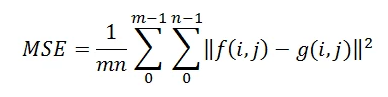

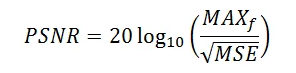

In [64]:
def psnr(img1, img2):
    """
    is this signal to noise ratio between two images to define how similar they are before type conversion
    if it is high it means the compression is good, if it is low it means the image is very noisy
    """
    #mean squared error:
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "MSE is zero"
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [66]:
print(psnr(ref_image, img_tif))
print(psnr(ref_image, img_png))
print(psnr(ref_image, img_jpg90))

print(psnr(ref_image, np.random.randint(0, 255, ref_image.shape)))

MSE is zero
MSE is zero
46.44677587183652
5.940154005494564


In [79]:
import pandas as pd

# get all meta data information 
all_meta_data = []

for f in glob_filenames:
    # open .meta file
    meta_file = open(f)
    meta_data = json.load(meta_file)
    all_meta_data.append(meta_data)
    
df = pd.DataFrame(all_meta_data)
df

,Video Id,Camera,Sampling rate (Hz),"Video resolution (px, HxW)",Color,Endoscope orientation,Endoscope application,Age range (yrs),Subject sex,Subject disorder status,Segmenter,Post-processed
0,85,HERS 5562 Endocam Wolf,4000,"[256, 256]",False,90°,oral,40-50,m,healthy,0,2
1,195,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,50-60,m,Muscle tension dysphonia,0,2
2,153,Phantom v210,3000,"[352, 208]",False,None,,,,,1,2
3,36,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,80-90,m,healthy,0,1
4,25,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,20-30,m,Muscle tension dysphonia,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,635,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,40-50,w,healthy,0,1
96,131,Phantom v210,3000,"[352, 208]",False,None,,,,,1,2
97,137,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,40-50,w,healthy,0,1
98,427,KayPentax HSV 9710 (Photron),4000,"[512, 256]",False,70°,oral,20-30,w,healthy,0,2


In [ ]:
df.to_csv("metadata.csv")

## Load Glottis video from BAGLS

In [80]:
vid_path = path + "/glottis_video.mp4"  # you can use any arbitrary .mp4 video here or download a glottis video from here: https://www.bagls.org/

In [82]:
from IPython.display import Video
Video(vid_path, embed=True)

In [98]:
# load video using scikit-video

import skvideo.io  
glottis_video = skvideo.io.vread(path + "/pexels-mikhail-nilov-7815884.mp4")  
glottis_video.shape

(615, 1920, 1080, 3)

In [ ]:
# load video using imageio

# import imageio
# glottis_video = imageio.mimread(path + "/pexels-mikhail-nilov-7815884.mp4")
# np.asarray(glottis_video).shape


In [99]:
import ipywidgets as widgets

alpha_slider = widgets.FloatSlider(
    value=1.,
    min=0,
    max=1.0,
    step=0.01,
    description='Alpha',
)

@widgets.interact(n=(0, len(glottis_video)-1))
def f(n=5, alpha=alpha_slider):
    plt.imshow(glottis_video[n], alpha=alpha)

interactive(children=(IntSlider(value=5, description='n', max=614), FloatSlider(value=1.0, description='Alpha'…

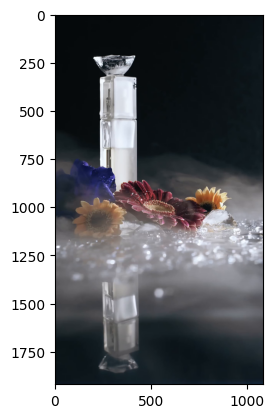

In [100]:
# load video frame by frame by creating an iterable reader object

vid_reader = imageio.get_reader(path + "/pexels-mikhail-nilov-7815884.mp4",  'ffmpeg')

for frame in vid_reader.iter_data():
    plt.imshow(frame)
    break

In [111]:
# JSON files
metadata = vid_reader.get_meta_data()
metadata

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2-static https://johnvansickle.com/ffmpeg/ built with gcc 8 (Debian 8.3.0-6)',
 'codec': 'h264',
 'pix_fmt': 'yuv420p(tv',
 'fps': 25.0,
 'source_size': (1080, 1920),
 'size': (1080, 1920),
 'rotate': 0,
 'duration': 24.6}

In [112]:
import json

with open('video_metadata_example.json', 'w') as f:
    json.dump(metadata, f, indent=2)

In [113]:
with open('video_metadata_example.json', 'r') as f:
    data = json.load(f)
data

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2-static https://johnvansickle.com/ffmpeg/ built with gcc 8 (Debian 8.3.0-6)',
 'codec': 'h264',
 'pix_fmt': 'yuv420p(tv',
 'fps': 25.0,
 'source_size': [1080, 1920],
 'size': [1080, 1920],
 'rotate': 0,
 'duration': 24.6}

In [114]:
# save videos lossless

imageio.mimwrite("saved_video.mp4", 
                 glottis_video,   # video 
                 fps=100,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'veryslow']) # Maximum compression: veryslow, 
                                                         # maximum speed: ultrafast
    
# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1080, 1920) to (1088, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x64b79c0] Warning: data is not aligned! This can lead to a speed loss


277212546

In [115]:
# save videos lossless

imageio.mimwrite("saved_video.mp4", 
                 glottis_video,   # video 
                 fps=100,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'ultrafast']) # Maximum compression: veryslow, 
                                                         # maximum speed: ultrafast
    
# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1080, 1920) to (1088, 1920) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x72db9c0] Warning: data is not aligned! This can lead to a speed loss


361883014

In [ ]:
# compare original loaded videeo and the saved video

saved_vid = imageio.mimread("saved_video.mp4")
np.allclose(glottis_video, saved_vid)

True

In [116]:
# Flammkuchen
import flammkuchen as fl

d = {
    'tabular': pd.DataFrame(np.random.random((20,40))), # random tabular data
     'videos': np.random.randint(0, 256, (30, 256, 256, 3)).astype(np.uint8), # random video
     'json': dict(name='John Doe', age=32, gender="d") # random meta data
}

fl.save("my_hdf5_file.h5", d)

In [117]:
fl.meta("my_hdf5_file.h5")

{'json': DictNode(age=ValueNode(type=<class 'numpy.int64'>), gender=ValueNode(type=<class 'numpy.str_'>), name=ValueNode(type=<class 'numpy.str_'>)),
 'tabular': PandasDataFrameNode((40, 20)),
 'videos': NumpyArrayNode(shape=(30, 256, 256, 3), dtype=uint8)}

In [118]:
random_video = fl.load("my_hdf5_file.h5", "/videos")
random_video.shape

(30, 256, 256, 3)

In [119]:
# And only a portion of the video, e.g. only the red channel of the first 5 frames
r_first_5_frames = fl.load("my_hdf5_file.h5", "/videos", sel=fl.aslice[:5, ..., 0])
r_first_5_frames.shape

(5, 256, 256)